# Notebook of analyze scRNA-seq data from 10x CellRanger format  

## Loading Data

### load package used in pipeline

In [87]:
library(Seurat)#main analyze package
library(harmony)# use to remove batch effect
library(dplyr)
library(data.table)

### load 10x data

#### BP

In [14]:
#load 10x
rawdataBP1 <- Read10X(data.dir = "./RNA-seq-expressions/BP1/")

rawdataBP2 <- Read10X(data.dir = "./RNA-seq-expressions/BP2/")

In [15]:
# Create Seurat Object from matrix 
bp1 <- CreateSeuratObject(rawdataBP1,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_bp1')

bp2 <- CreateSeuratObject(rawdataBP2,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_bp2')

# add metadata original identity
bp1@meta.data$orig.ident <- "BP1"
bp2@meta.data$orig.ident <- "BP2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [16]:
#merge Seurat Object in different batch
bp <- merge(bp1,
            y = bp2,
            add.cell.ids = c("BP1.","BP2."),
            project = "10x_BP")

#### ZQ

In [17]:
#load 10x
rawdataZQ1 <- Read10X(data.dir = "./RNA-seq-expressions/ZQ1/")

rawdataZQ2 <- Read10X(data.dir = "./RNA-seq-expressions/ZQ2/")

In [18]:
# Create Seurat Object from matrix 
zq1 <- CreateSeuratObject(rawdataZQ1,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_zq1')

zq2 <- CreateSeuratObject(rawdataZQ2,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_zq2')

# add metadata original identity
zq1@meta.data$orig.ident <- "ZQ1"
zq2@meta.data$orig.ident <- "ZQ2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [19]:
#merge Seurat Object in different batch
zq <- merge(zq1,
            y = zq2,
            add.cell.ids = c("ZQ1.","ZQ2."),
            project = "10x_ZQ")

#### HY

In [20]:
#load 10x
rawdataHY1 <- Read10X(data.dir = "./RNA-seq-expressions/HY1/")

rawdataHY2 <- Read10X(data.dir = "./RNA-seq-expressions/HY2/")

In [21]:
# Create Seurat Object from matrix 
hy1 <- CreateSeuratObject(rawdataHY1,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_hy1')

hy2 <- CreateSeuratObject(rawdataHY2,
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_hy2')

# add metadata original identity
hy1@meta.data$orig.ident <- "HY1"
hy2@meta.data$orig.ident <- "HY2"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [22]:
#merge Seurat Object in different batch
hy <- merge(hy1,
            y = hy2,
            add.cell.ids = c("HY1.","HY2."),
            project = "10x_HY")

### merge_all

In [23]:
# read rds file if alreadly get raw data
bp <- readRDS(file = "./pipline_reanalyze/raw_bp_rna.rds")
hy <- readRDS(file = "./pipline_reanalyze/raw_hy_rna.rds")
zq <- readRDS(file = "./pipline_reanalyze/raw_zq_rna.rds")

In [25]:
# add original identity in to metadata
bp1 <- bp[ ,bp@meta.data$orig.ident == 'BP1']
bp2 <- bp[ ,bp@meta.data$orig.ident == 'BP2']

hy1 <- hy[ ,hy@meta.data$orig.ident == 'HY1']
hy2 <- hy[ ,hy@meta.data$orig.ident == 'HY2']

zq1 <- zq[ ,zq@meta.data$orig.ident == 'ZQ1']
zq2 <- zq[ ,zq@meta.data$orig.ident == 'ZQ2']

#add group information into metadata
bp1@meta.data$group <- 'BP'
bp2@meta.data$group <- 'BP'
hy1@meta.data$group <- 'HY'
hy2@meta.data$group <- 'HY'
zq1@meta.data$group <- 'ZQ'
zq2@meta.data$group <- 'ZQ'

#add batch information into metadata
bp1@meta.data$batch <- 'B1'
hy1@meta.data$batch <- 'B1'
zq1@meta.data$batch <- 'B1'
bp2@meta.data$batch <- 'B2'
hy2@meta.data$batch <- 'B2'
zq2@meta.data$batch <- 'B2'


# merge Seurat Object
allRNA  <- merge(bp1,
            y = c(bp2, hy1, hy2, zq1, zq2),
            #add.cell.ids = c("BP.","HY.",'ZQ.'),
            project = "10x_RNA")

#show statistics of metadata
table(allRNA$group)
table(allRNA$orig.ident)
table(allRNA$batch)


   BP    HY    ZQ 
 8549 17199  4794 


 BP1  BP2  HY1  HY2  ZQ1  ZQ2 
5758 2791 7822 9377 2456 2338 


   B1    B2 
16036 14506 

In [26]:
#save in to rds
allRNA

An object of class Seurat 
18678 features across 30542 samples within 1 assay 
Active assay: RNA (18678 features, 0 variable features)

## remove cls0(blood cells)

### remove blood cells

In [137]:
filtered_bp1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'BP1'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_bp1')
filtered_bp2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'BP2'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_bp2')

filtered_hy1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'HY1'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_hy1')
filtered_hy2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'HY2'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_hy2')

filtered_zq1 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'ZQ1'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_zq1')
filtered_zq2 <- CreateSeuratObject(allRNA@assays$RNA[  ,allRNA@meta.data$seurat_clusters!=0 & allRNA@meta.data$orig.ident == 'ZQ2'],
                           min.cells = 1,
                           min.features = 0,
                           project = '10x_filtered_zq2')


filtered_hy1@meta.data$orig.ident <- "HY1"
filtered_hy2@meta.data$orig.ident <- "HY2"
filtered_bp1@meta.data$orig.ident <- "BP1"
filtered_bp2@meta.data$orig.ident <- "BP2"
filtered_zq1@meta.data$orig.ident <- "ZQ1"
filtered_zq2@meta.data$orig.ident <- "ZQ2"

filtered_bp1@meta.data$group <- "BP"
filtered_bp2@meta.data$group <- "BP"
filtered_hy1@meta.data$group <- "HY"
filtered_hy2@meta.data$group <- "HY"
filtered_zq1@meta.data$group <- "ZQ"
filtered_zq2@meta.data$group <- "ZQ"

filtered_hy1@meta.data$batch <- "B1"
filtered_hy2@meta.data$batch <- "B2"
filtered_bp1@meta.data$batch <- "B1"
filtered_bp2@meta.data$batch <- "B2"
filtered_zq1@meta.data$batch <- "B1"
filtered_zq2@meta.data$batch <- "B2"

filtered <- merge(filtered_bp1,
            y = c(filtered_bp2,filtered_hy1,filtered_hy2,filtered_zq1,filtered_zq2),
            project = "10x_rna_filtered")

table(filtered$group)
table(filtered$orig.ident)
table(filtered$batch)


  BP   HY   ZQ 
6362 5180 4291 


 BP1  BP2  HY1  HY2  ZQ1  ZQ2 
5086 1276 2333 2847 2432 1859 


  B1   B2 
9851 5982 

###  Run PCA before Harmony

In [138]:
filtered <- NormalizeData(filtered, verbose = FALSE)

filtered <- FindVariableFeatures(object = filtered, mean.cutoff = c(0.125,8), dispersion.cutoff = c(1,Inf))

filtered <- ScaleData(filtered, verbose = FALSE)

filtered <- RunPCA(filtered, verbose = FALSE, features = VariableFeatures(object = filtered))

An object of class Seurat 
18525 features across 15833 samples within 1 assay 
Active assay: RNA (18525 features, 2000 variable features)
 1 dimensional reduction calculated: pca

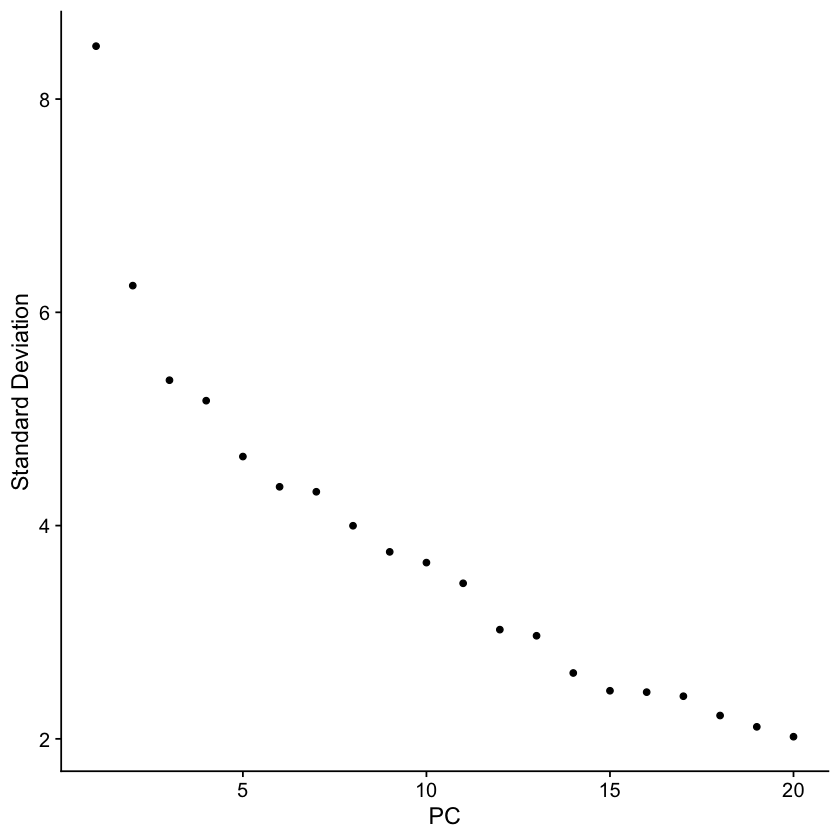

In [139]:
ElbowPlot(filtered)
filtered

### Run Harmony

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


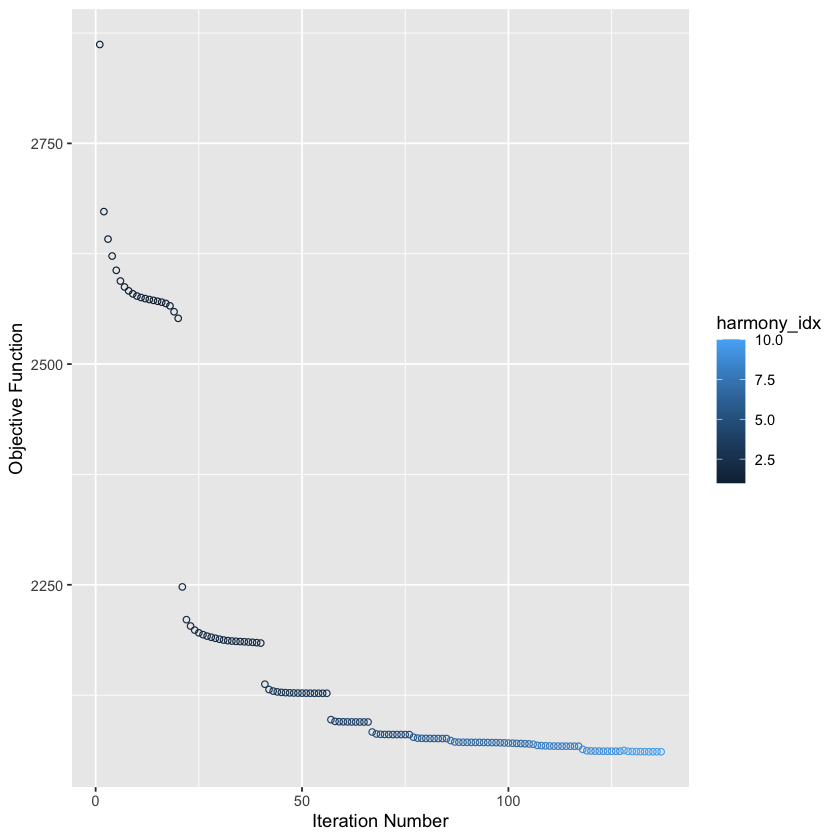

In [140]:
filtered <- RunHarmony(filtered,
                       "batch",
                       plot_convergence = TRUE,
                      #assay.use = "SCT",
                       assay.use = "RNA"
                      )

### Run Cluster

In [141]:
filtered <- RunTSNE(filtered, reduction = "harmony", verbose = FALSE, dims = 1:18)
filtered <- RunUMAP(filtered, reduction = "harmony", verbose = FALSE, dims = 1:18)

filtered <- FindNeighbors(filtered, reduction = "harmony", dims = 1:18)
filtered <- FindClusters(object = filtered, resolution = 0.125)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15833
Number of edges: 580226

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9757
Number of communities: 15
Elapsed time: 1 seconds


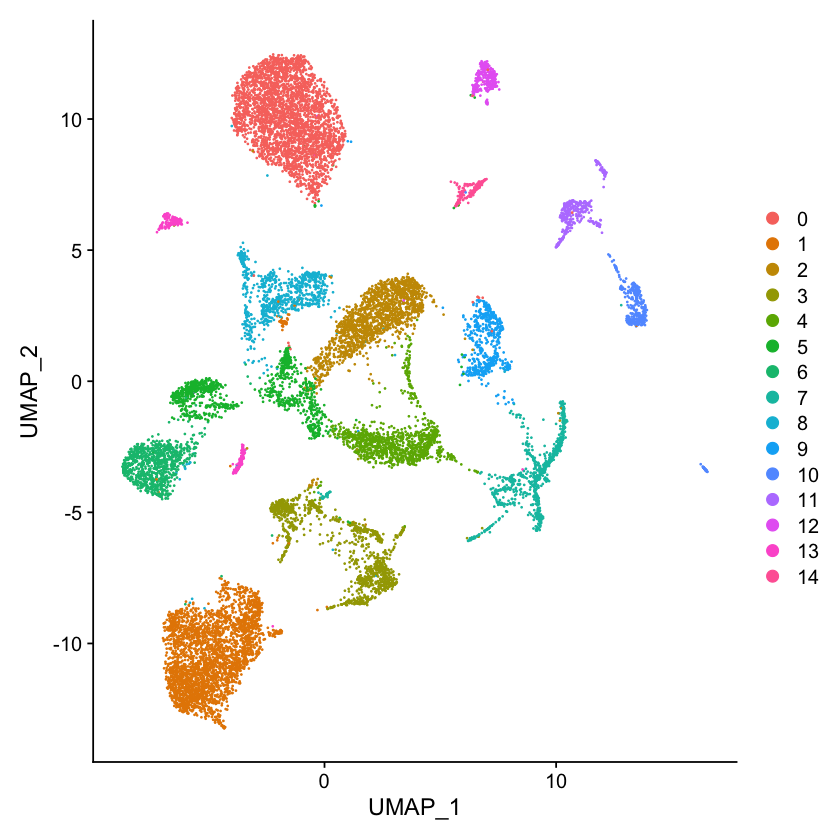

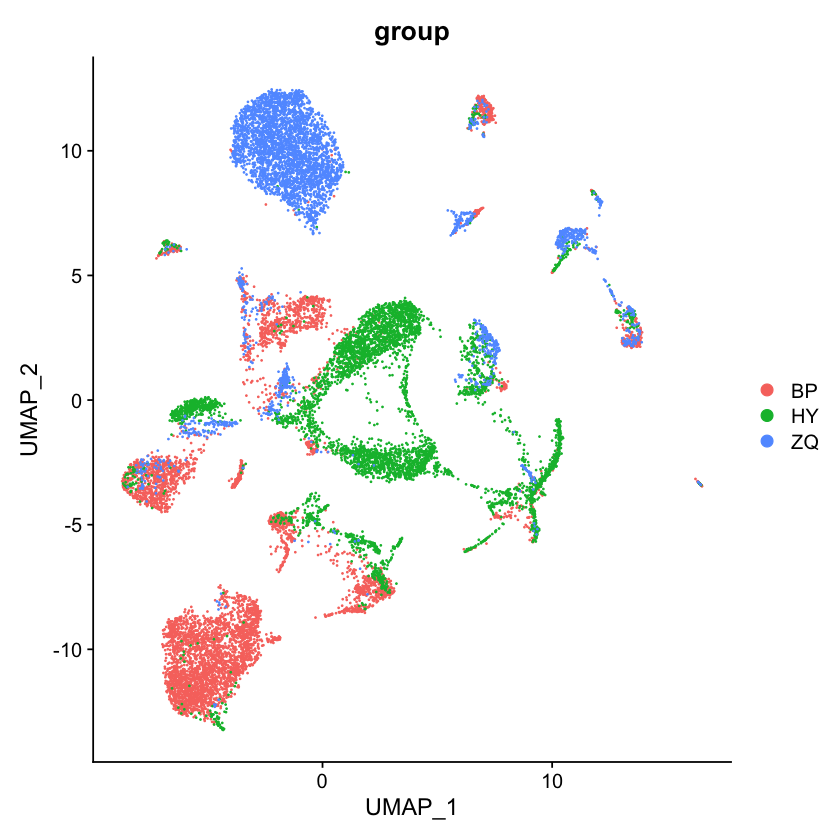

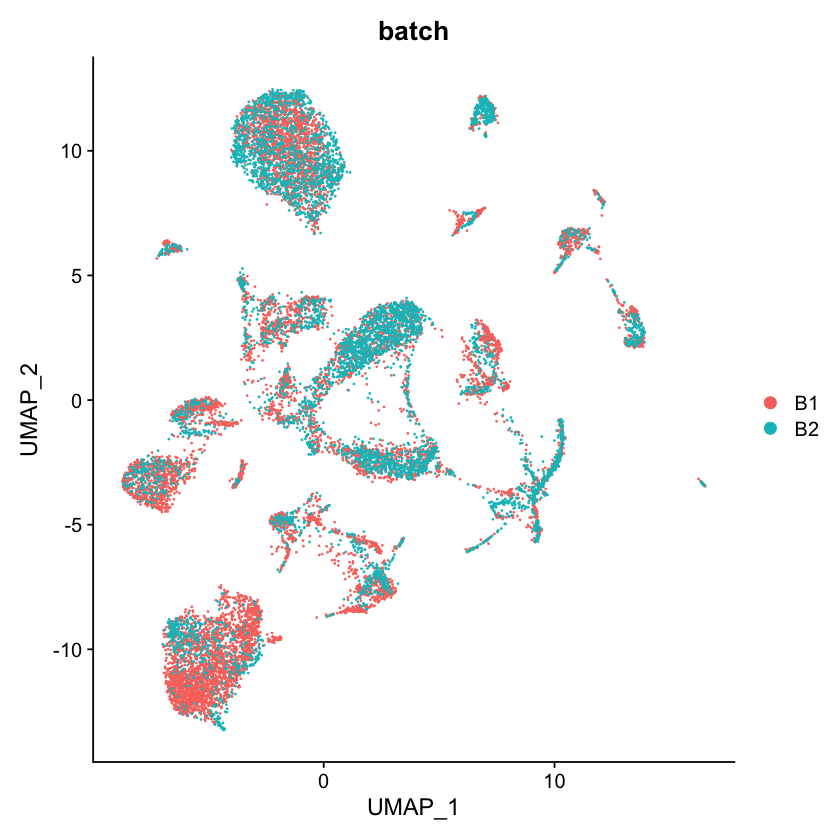

In [143]:
DimPlot(object =filtered,
        reduction = "umap")
DimPlot(object =filtered,
        group.by = 'group',
        reduction = "umap")
DimPlot(object =filtered,
        group.by = 'batch',
        reduction = "umap")

### Find Marker

In [52]:
all_markers <- FindAllMarkers(filtered, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14



## cell-type annotate(first version)

### annotate clusters

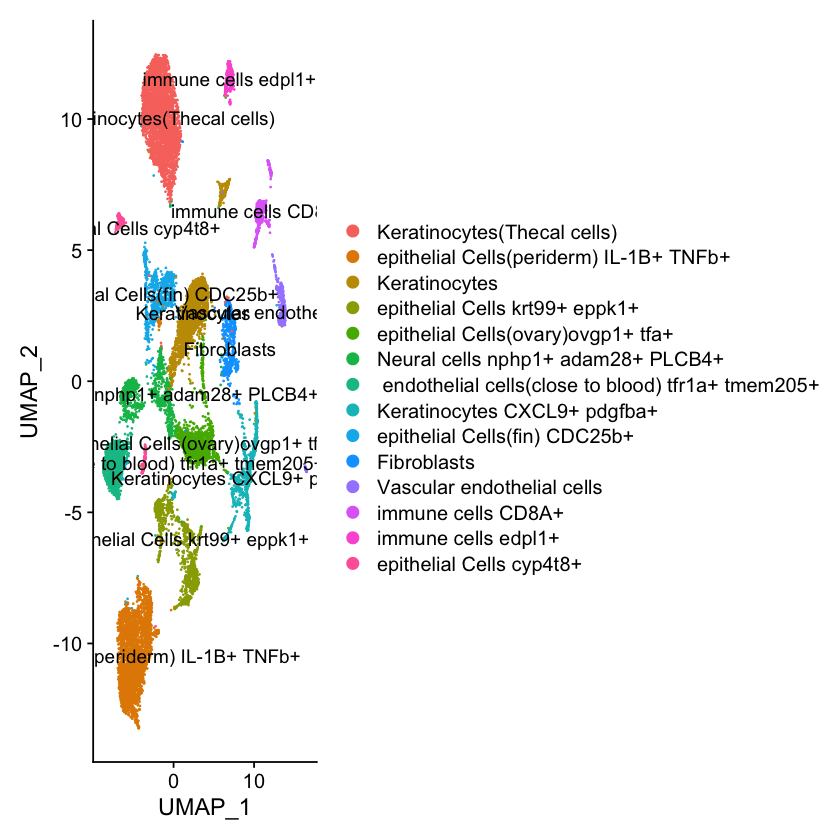

In [160]:
new.cluster.ids <- c("Keratinocytes(Thecal cells)",
                     "epithelial Cells(periderm) IL-1B+ TNFb+",
                     "Keratinocytes",
                     "epithelial Cells krt99+ eppk1+",
                     "epithelial Cells(ovary)ovgp1+ tfa+",
                     "Neural cells nphp1+ adam28+ PLCB4+",
                     " endothelial cells(close to blood) tfr1a+ tmem205+",
                     "Keratinocytes CXCL9+ pdgfba+ ",
                     "epithelial Cells(fin) CDC25b+",
                     'Fibroblasts',
                     'Vascular endothelial cells',
                     'immune cells CD8A+',
                     'immune cells edpl1+',
                     'epithelial Cells cyp4t8+',
                      'Keratinocytes')# 将细胞类型标识分给每个簇

names(new.cluster.ids) <- levels(filtered)

filtered <- RenameIdents(filtered, new.cluster.ids)

DimPlot(filtered, reduction = "umap", label = TRUE)